<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/CA2writeupipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science - Coursework 2 (50%)

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d

%matplotlib inline

## What caused this gravitational wave signal?

https://arxiv.org/pdf/1608.01940

***

## **Part A - Some background** - [15 marks]

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated
masses, that propagate as waves outward from their source at the speed of light. They are predicted
in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of
the merging objects and their distance from us to the observed waveform. This will allow us to
determine the nature of the orbiting objects that merged to form the gravitational wave using
MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars
or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects
coalesce. The strain describes the amplitude of the wave. The system is parameterised by the
masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.

Other useful parameters and equations relevant for this assessment are given in the Chapter 8
Jupyter Notebook.


***

#### How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

**[2 marks]**

First theorised by Albert Einstein in his theory of general relativity in 1915, gravitational waves are ripples in the fabric of spacetime caused by large violent astrophysical events. The first confirmed detection of a gravitational wave was announced nearly a century later in 2016, marking a groundbreaking achievement and dawning a new era in observational astronomy. The event later denoted as "GW150914", was observed on September 14th 2015 by the Laser Interferometer Gravitational-Wave Observatory (LIGO) and confirmed a key prediction of Einstein's general theory of relativity. The event originated from a binary black hole merger with black holes of masses: $M_1\approx35^{+5}_{-3}\,M_\odot$ and $M_2\approx30^{+3}_{-4}\,M_\odot$ at a luminosity distance of approximately $D_L\approx440^{+160}_{-180}\,Mpc$. There were numerous reasons that astronomers were able to conclude that the gravitational waves from the GW150914 event were emitted by the inspiral and merger of two black holes, the main ones include:

1. **Mass and Energy Calculations:** At its peak amplitude, the orbital separation of the two bodies was estimated to be around $350km$. This is a very small value compared to the normal distance between stars, and hence enabled astronomers to constrain the objects to be extremely small or else they would have collided and merged before reaching such close proximity. The radii of main-sequence stars can be millions of kilometers, with even the smallest of stars, white dwarf stars, having radii typically ten thousand kilometers both of which would not fit with the calculated orbital separation. The most compact stars, neutron stars, have a radii of around 10 kilometers, and although two neutron stars could havev orbited at this separation without colliding or merging, the maximum mass a neutron star can have before collapsing into a black hole is around $3\,M_\odot$. However, the masses were estimated to be $M_1\approx35^{+5}_{-3}\,M_\odot$ and $M_2\approx30^{+3}_{-4}\,M_\odot$ hence ruling out neutron stars as a possibility. Hence the calculated masses of the merging objects $M_1$ and $M_2$ and the energy released (about $3\,M_\odot$) were consistent with the merging of two black holes.

2. **Matching Model Waveforms:** The observed gravitational wave signal was analysed by fitting it to theoretical models that vary based on key parameters of the black holes, such as their masses and their distance. The waveform's frequency and amplitude change over time aligned with the expected behavior of two black holes merging and was consistent with general relativity predictions for binary black hole mergers with masses $M_1$ and $M_2$ as described above. An example of this waveform matching can be seen below.

3. **Final Black Hole:** The post-merger ringdown indicated the formation of a single, more massive spinning object as a result of two objects merging, with a mass typical of a black hole.

These points helped to confirm the source of the gravitational wave signal as a binary black hole merger.

**Details from the paper** - *Abbott, Benjamin P., Richard Abbott, T. D. Abbott, M. R. Abernathy, Fausto Acernese, K. Ackley, C. Adams et al. "Properties of the binary black hole merger GW150914." Physical review letters 116, no. 24 (2016): 241102.*

***

####  Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

**[3 marks]**

The waveform produced by gravitational waves from a merging black hole event can be divided into three main phases: the **inspiral**, **merger**, and the **ringdown**. Each phase corresponds to a distinct part of the binary black hole evolution and is characterized by unique features in the waveform's frequency and amplitude.

1. **Inspiral Phase:**
The inspiral phase begins when the two black holes are orbiting each other still relatively far apart. During this phase, the black holes emit gravitational waves as they lose energy, causing their orbits to decay and the two bodies to circle closer together. This results in a characteristic "chirp" pattern, where the frequency and amplitude of the signal increases over time as the black holes spiral closer together This phase can often be described using approximations of general relativity.


2. **Merger Phase:**
The merger phase occurs when the two black holes orbit in such close proximity to each other that their event horizons merge to form a single black hole. This phase is marked by the most energetic emission of gravitational waves, with the peak amplitude of the waveform occurring at the exact moment of coalescence. The frequency continues to increase sharply as the two black holes collide, reaching its maximum at the point of the merger. This phase requires full numerical solutions of Einstein's equations due to the highly non-linear and dynamic nature of spacetime.


3. **Ringdown Phase:**
The ringdown phase begins immediately after the merger, as the newly formed black hole settles into a stable, final state. During this phase the black hole emits gravitational waves in the form of damped oscillations, known as quasinormal modes, as it loses residual distortions and approaches equilibrium. The amplitude of the gravitational waves decreases exponentially, and the frequency stabilizes as the black hole settles. The ringdown phase is governed by the properties of the newly formed black hole, like its final mass and spin, and can be described by perturbation theory in general relativity. Analysis of the ringdown provides critical information about the mass, spin, and potential deviations from general relativity.

When observed as a whole, the waveform reflects the transition from a slow, steady inspiral to a rapid merger, followed by a gradual fading in the ringdown. Each phase encodes specific information about the black hole system and the dynamics of the merger, making the study of gravitational waveforms a powerful tool for testing general relativity and exploring the universe.


**Image from:** *Almbaidin, Hisham Osama Abdel Hafez. "Theoretical Estimation of the Parameters of the Black Hole-Neutron Star Merger GW200115 via Inspiral, Merger and Ringdown IMR Numerical Relativity Frameworks." PhD diss., Hashemite University, 2023.*

***

#### The file `gravitationalwaveevents.csv` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass (given in solar masses, $1M_⊙ = 1.99\times 10^{30} kg$) of the merging sources against their distance (given in units of $Mpc$, $1 pc = 3 \times 10^{16}m$).

**[10 marks]**

Reading in the `gravitationalwaveevents.csv` file containing the key parameters of multiple gravitational wave events, allows us to identify any preliminary trends within the data.
This could provide valuable insights about our findings later on in the analysis. As an initial step, we can plot the parameters in order to visualise the relationship between the total mass of the merging sources and their distance from the observer, as shown in the code below.

We start by reading in the posteriors from the data file and defining the parameters (total mass and distance) with their associated errors.

In [3]:
#Reading in the posteriors and defining the parameters and their errors
posteriors=pd.read_csv('gravitationalwaveevents.csv')
total_mass = posteriors['Mtot']
mass_error = posteriors['Mtot_err']
distance = posteriors['DL']
distance_error = posteriors['DL_err']

Now we can use a plot with error bars to help us visualise the data and see how the errors vary as the total mass and distance from the observer increase.

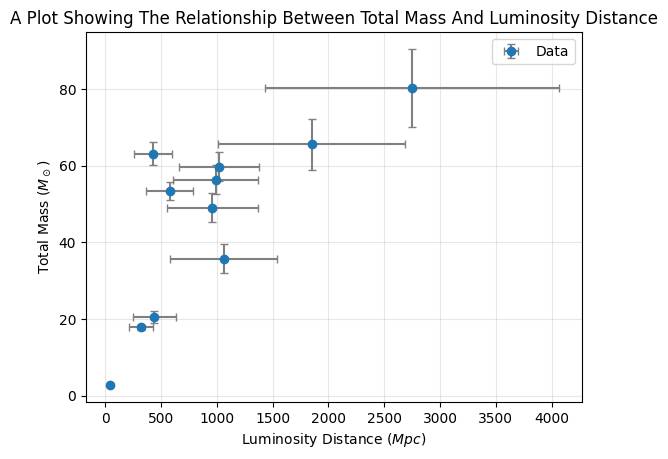

In [4]:
#Creating a plot with error bars to help visualise the data
plt.errorbar(distance, total_mass, xerr=np.abs(distance_error), yerr=np.abs(mass_error), fmt='o', label="Data", ecolor='gray', capsize=3)
plt.title("A Plot Showing The Relationship Between Total Mass And Luminosity Distance")
plt.xlabel("Luminosity Distance ($Mpc$)")
plt.ylabel("Total Mass ($M_\odot$)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This plot shows the relationship between the total mass and the luminosity distance (in megaparsecs) where each data point represents a previously observed gravitational wave event. The vertical error bars represent the uncertainties in the total mass and the horizontal error bars show the errors in luminosity distance.

From the graph above we can make three key observations:

- A trend emerges where objects with larger total masses tend to be observed at greater distances. This is due to selection effects and does not necessarily mean larger mass systems are more common but they more produce stronger gravitational waves which are easier to detect at large distances. Smaller masses emit weaker signals that become harder to detect as the distance increases, making them less likely to be observed.

- Larger uncertainties can be seen for more distant events. This could be due to a mass-distance degeneracy where at larger masses, it becomes more difficult to separate the effects of mass and distance as higher masses can mimic stronger signals. It could also be due to detector sensitivity limits, as parts of the signals from massive mergers may occur at lower frequencies where detectors have reduced sensitivity.

- There are also several events clustered at lower distances, around $~500-1500 Mpc$, with masses around $50-60M_\odot$. This is most likely due to observational biases towards nearby events and limits in the detection sensitivity increasing the likelihood of detecting events in these specific mass and distance ranges.

From this we can determine there is a strong correlation between the luminosity distance and the total mass of the binary system.

We can estimate the means and standard deviations as they immediately tell us something useful about the data.






In [5]:
#Calculating the means and standard deviations of the data
total_mass_mean = np.mean(total_mass)
total_mass_std = np.std(total_mass)
distance_mean = np.mean(distance)
distance_std = np.std(distance)
print('The mean of the total mass is {:.2f} solar masses with a standard deviation of {:.2f} solar masses.'.format(total_mass_mean, total_mass_std))
print('The mean of the distance is {:.2f} Mpc with a standard deviation of {:.2f} Mpc.'.format(distance_mean, distance_std))

The mean of the total mass is 45.86 solar masses with a standard deviation of 22.63 solar masses.
The mean of the distance is 949.09 Mpc with a standard deviation of 736.15 Mpc.


By estimating the means and standard deviations we can get an immediate sense of how spread out or consistent the data points are around the mean.
From this, we can see that most of the detected mergers involve intermediate mass black holes with masses around $45.86M_\odot$, however the large standard deviation of $22.63M_\odot$ indicates a significant variation in the total mases. Most of the events are observed within ~1 gigaparsec, with a mean distance calculated to be $949.09Mpc$, however once again there is a wide variation with a standard deviation of $736.15Mpc$ with some events much further away.

To see if this correlation is significant, we can use a non-parametric test as they do not assume anything about the underlying distribution. In this case this is particularly important as we have a relatively small sample size with large variation and there seems to be an outlier in the data.

The data appears to be monotonic we can use the Spearmans Rho test which measures the monotonic association between two variables and only relies on the rank order of the values. It is not restricted to only linear relationships and is also not so sensitive to outliers at the extremes of the mass and distance as the Pearson correlation coefficient because points are treated by their rank rather than their intrinsic value.

We can also propose a null and alternate hypothesis:

*   **Null hypothesis ($H_0$):** There is no statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho=0$.
*   **Alternate hypothesis ($H_1$):** There exists a statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho\neq0$.

Spearman's rank correlation is given by the equation:

$\rho_s=\dfrac{\sum_{i=1}^N\,R(x_i)\,R(y_i)-N(N+1)^2/4} {\sqrt{\sum_{i=1}^N\,R(x_i)^2-N(N+1)^2/4}\sqrt{\sum_{i = 1}^N  \,R(y_i)^2-N(N+1)^2/4}}$

which, in the case of no ties as with our data (i.e. duplicates of mass and distance), the above expression reduces to:

$\rho_s=1-\dfrac{\sum_{i = 1}^N\,[R(x_i) -R(y_i)]^2}{N\,(N^2-1)}$

To perform a Spearman's Rho test on the data we can use the built-in function `stats.spearmanr` to determine a value for the Spearmans Rho correlation and a p value.

In [6]:
#Performing Spearmans Rho on the data
correlation, p_value = stats.spearmanr(distance, total_mass)
print(f"Spearman's rho: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Spearman's rho: 0.71
P-value: 0.01


A Spearmans rho coefficient of $\rho=0.71$ tells us that there exists a strong positive correlation between the luminosity distance of a detected binary system and it's total mass. This result implies that higher total masses are generally observed at greater distances.

Comparing our p-value of $p=0.01$ to a significance level of 0.05, we can determine that the correlation is statistically significant and that the probability of obtaining this strong of a correlation by random chance (if no relationship exists) is only 1%. Therefore we can reject the null hypothesis hat there is no correlation.

Generally higher mass systems produce stronger gravitational wave signals with larger amplitudes which can be detected more easily, even at greater distances. As the distance increases, the amplitude decreases and only the larger mass events are likely to be detected. This explains the observed trend that higher mass systems are more common at a larger distance in the data.

We can conduct further tests on the data to probe the correlation further. Kendall's $\tau$ can be used as unlike the Spearman $\rho$ statistic it does not consider the difference between ranked data, instead it only takes into account the directional agreement. That makes the Kendall's $\tau$ coefficient more appropriate for discrete data which our data is. It is defined as:

${\tau={\dfrac{({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$

where concordant pairs are pairs of values whose ranks coincide:
- $x1<x2$ and $y1<y2$ or $x1>x2$ and $y1>y2$.

and a discordant pair is one that does not satisfy this condition.

The null hypothesis, $H_0$, for Kendall $\tau$ would be that the variables are uncorrelated and the alternative hypothesis, $H_1$, is that the mass and distance are correlated.

To perform a Kendall's tau test on the data we can use the built-in function `stats.kendalltau`.

In [7]:
#Performing Kendall's tau on the data
kendall_tau, p_value = stats.kendalltau(distance, total_mass)
print(f"Kendall's Tau: {kendall_tau:.2f}")
print(f"P-value: {p_value:.2f}")

Kendall's Tau: 0.60
P-value: 0.01


***

## **Part B - The data** - [15 marks]

Now it is your turn to look at observations and measure the mass and distance of the merging system. We first need to access the observational data measured with the gravitational wave detectors (the waveform observed when two compact, dense astrophysical objects coalesce), and format it correctly.


***

####  Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of “GPS time” for the merger of two bodies.

**[5 marks]**

To read in the datafile containing our observed waveform, we can use the pandas library to read in the `Observedwaveform.csv` and store it in a data frame `observed_waveform`. This dataframe consists of two columns, the first column includes information about the strain of the gravitational wave, a dimensionless quantity that is a measure of how much spacetime is stretched and squeezed by the passing wave.The second column consists of the GPS time of the event, a highly accurate timing system used by satellites and GPS to count the number of seconds from an arbitrary time of January 6th 1980 at 00:00:00 UTC.

We can start by reading in the datafile using `pandas` and then define the time and strain of the observed event from the dataframe.

In [8]:
# Reading in the file Observedwaveform.csv
observed_waveform = pd.read_csv('Observedwaveform.csv')

# Defining the time and strain of the observed event from the dataframe
obs_time = observed_waveform['time (s)']
obs_strain = observed_waveform['strain']

We can then plot the observed waveform to help us get a sense of what it looks like.



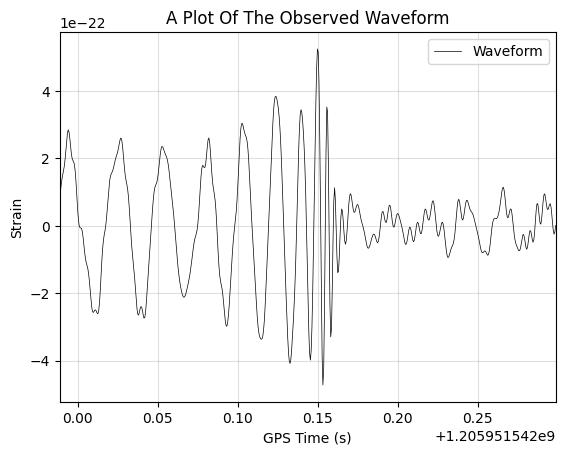

In [9]:
#Plotting the observed gravitational wave
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

Replotting the above gravitational wave and identifying the three main phases of the waveform: inspiral, merger and ringdown.

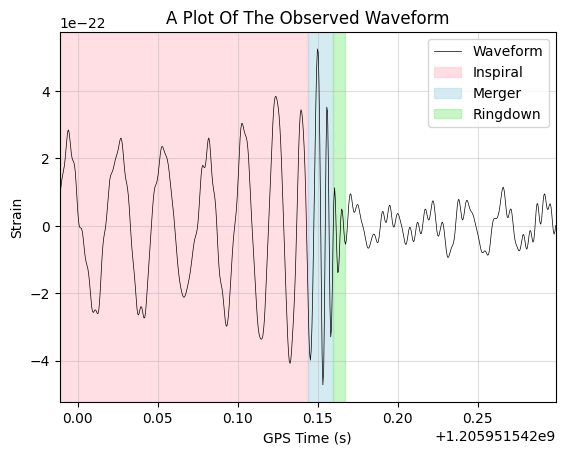

In [10]:
#Plotting the waveform with the 3 main phases identified
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
#1st stage - INSPIRAL
plt.axvspan(obs_time[0],obs_time[318],color='pink',alpha=0.5, label = 'Inspiral')
#2nd stage - MERGER
plt.axvspan(obs_time[318],obs_time[350],color='lightblue',alpha=0.5, label = 'Merger')
#3rd stage - RINGDOWN
plt.axvspan(obs_time[350],obs_time[365],color='lightgreen',alpha=0.5, label = 'Ringdown')

#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

The oscillating waveform in the plot above shows the strain induced in spacetime due to a passing gravitational wave from a compact binary merger. The x axis represents the time in seconds since a specific reference point with the duration of the gravitational wave signal lasting around $0.25$ seconds. The y axis represents the strain amplitude which is of the order of $10^{-22}$, showing the distortion of spacetime is extremely small. In the initial part of this plot we can see a characteristic chirp pattern, where the frequency of the oscillations increase with time which implies the inward spiral and of the two objects such as black holes or neutron stars. The peak of the waveform ocuring at around $t = 0.15s$ represents the mergers of the two bodies where a significant amount of gravitational energy is released. After the merger, the resulting mass emits gravitational waves as it settles down to a stationary state hence we see a damped oscillation in the plot above.

By analysing the waveform's specific features, we can determine the key properties of the merging and resultant bodies, such as the masses and spins of the merging objects, their distance from Earth and their orientation. The capability to directly observe gravitational waves has made it much easier for scientists to determine these parameters.

***

#### The GPS time of the merger for your waveform is $1205951542.153363$. Your data will need to be shifted so that the merger occurs at time = 0 seconds. This is required for when we compare model waveforms with our data as the model waveforms are simulated with the merger at $t=0s$.

**[4 marks]**

Before analysing the waveform further, we need to make some minor adjustments to help simplify the process. One key step is to shift the time scale so that the merger of the two bodies occurs at time $t=0s$. By formating our data in this way, it allows us to compare it with model waveforms which are simulated with the merger at $t=0s$.

As the two compact objects inspiral, the frequency and amplitude of the gravitational wave increase. This enables us to identify the time at which the merger occurs, $t_{merge}$, as this corresponds to the point at which the strain amplitude peaks, reaching its maximum value, $h_{max}$. By subtracting this time from all the data points, we can recenter the waveform around the merger event such that it occurs at $t=0\,s$.

We first need to identify the maximum value of the absolute strain, as the peak of the strain could be a negative or positive value. We can then find the corresponding time to the maximum strain value and plot this on our graph in order to visually assess whether this aligns with where our waveform appears to peak.

1205951542.1498382


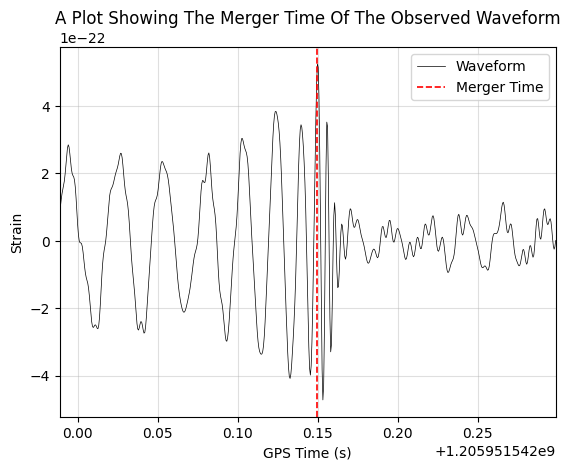

In [11]:
#Given the 'peak' strain can either be negative or positive, we need to find the max value of the absolute strain
abs_obs_strain = abs(obs_strain)

#Finding the time that corresponds to the maximum value of the strain
t_merge = obs_time[np.argmax(abs(obs_strain))]

#Plotting where t_merge occurs on the waveform to ensure that it is correct
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=t_merge, color='red', linestyle='--',linewidth=1.2, label='Merger Time')

#Formatting the plot
plt.xlim(min(obs_time),max(obs_time))
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.title('A Plot Showing The Merger Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

print(t_merge)

Now that we have verified that the objects merged at a GPS time of $t_{merge}\approx 1205951542.15s$, we can subtract this value from our time data points in order to time shift the data such that $t_{merge}=0$.

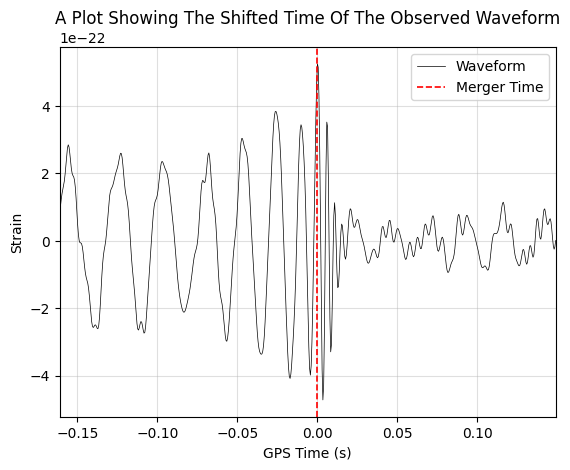

In [12]:
# Time Shifting The Data
ts_obs_time = obs_time - t_merge

#Replotting the data with the new x axis such that the merger occurs at t=0s
plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=0, color='red', linestyle='--',linewidth=1.2, label='Merger Time')

#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Shifted Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

We can verify in the plot above that the merger now occurs at time $t=0s$ where the strain amplitude peaks. This enables us to compare model waveforms with our data.

***

#### We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.

**[6 marks]**


Before estimating the average noise and its standard deviation in the data, it's important to understand the role noise plays in gravitational wave detection. Noise represents the random fluctuations in the detector's output that are not part of the astrophysical signal. These fluctuations can come from a variety of sources, including seismic vibrations, thermal noise, and instrument electronics.

To accurately characterize the gravitational wave signal, we need to first quantify the noise properties. This involves identifying segments of the data where the signal is absent or negligible, as these regions are most representative of the noise alone. Estimating the average noise level provides a baseline, while its standard deviation helps quantify the noise's variability. Careful consideration of where the noise dominates ensures that the analysis is both accurate and unbiased.

To estimate the noise properties, we first need to identify the area of the waveform where the signal-to-noise ratio (SNR) is lowest, i.e. where the gravitational wave signal is minimal, and the background noise dominates. Referring to the plot made from part 1 which highlights the different phases of the waveform (e.g. inspiral, ringdown etc), we can disregard times $t < t_{merge}$, as we assume the signal is still present in the form of the inspiral phase. Instead, we focus on the region after the ringdown phase, which is approximately at $t\approx0.025s$. After this point, we can assume that any remaining ringdown signal (if present) is negligible, leaving only pure noise in the data. This provides a reliable basis for estimating the average noise and its standard deviation.

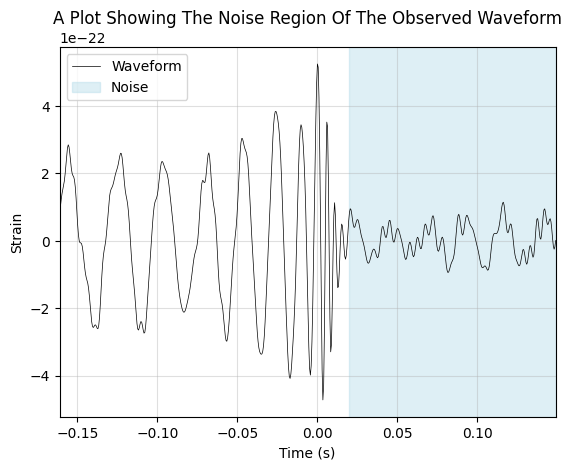

In [13]:
#Making a plot to help identify the noise after the ringdown phase at t=0.025s
plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvspan(0.02,ts_obs_time[635],color='lightblue',alpha=0.4, label = 'Noise')
plt.legend(loc = 'upper left')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Noise Region Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.show()

We can then extract this time frame from the waveform to analyse it further in order to calculate its mean and standard deviation. We can then subsequently compare the noise data to a normal distribution with the same mean and standard deviation by plotting both on the same graph to compare and examine how well they align.

As previously identified, the values of the pure noise after the ringdown phase occuring at around t=0.025s can be extracted and the mean and standard deviations can be determined. We can then make a plot of this noise with the mean and 1 sigma overlayed on the plot.

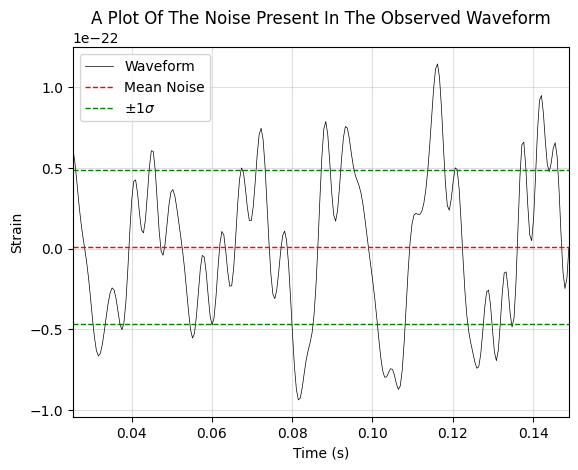

In [14]:
# Extracting the values where there's pure noise
obs_noise_time = ts_obs_time[ts_obs_time >= 0.025]
obs_noise_strain = obs_strain[ts_obs_time >= 0.025]

# Finding the mean and standard deviation
average_noise = np.mean(obs_noise_strain)
std_noise = np.std(obs_noise_strain)

# Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_noise, color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axhline(y= average_noise+std_noise, color='green', linestyle='--',linewidth=1, label='$\pm1\sigma$')
plt.axhline(y= average_noise-std_noise, color='green', linestyle='--',linewidth=1)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(alpha=0.4)
plt.legend()

We can now create a normal distribution using the previously calculated mean and standard distribution of the noise by using the built in function `stats.norm` to form our distribution. We can then create an evenly spaced array between the minimum and maximum values of our observed noise strain. Using another built in function `dist.pdf` in order to determine the probability density function which describes the probability of the variable falling within our set range of noise values.

The average noise value is 8.42e-25 with a standard deviation of 4.78e-23.


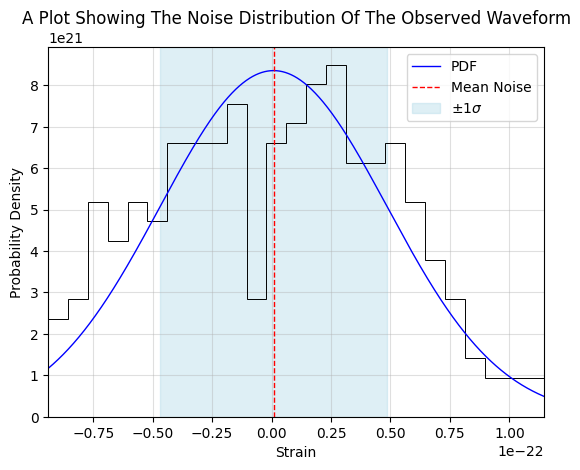

In [15]:
#Creating a normal distribution with the previously calculated mean and std of the noise
dist = stats.norm(average_noise,std_noise)
x = np.linspace(min(obs_noise_strain),max(obs_noise_strain),1000)
pdf = dist.pdf(x)

#Plotting a histogram to visualise this
plt.figure(figsize=(6.4, 4.8))
plt.hist(obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_noise , color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axvspan(average_noise - std_noise, average_noise + std_noise, color='lightblue', alpha=0.4, label='$\pm1\sigma$')
plt.xlim(min(obs_noise_strain),max(obs_noise_strain))
plt.title('A Plot Showing The Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.4)

print(f"The average noise value is {average_noise:.2e} with a standard deviation of {std_noise:.2e}.")

The black histogram represents the actual distribution of the noise values we observed in the data with the height of each bar indicating the frequency of the noise within each strain amplitude range. The blue curve is the PDF, an approximation of the underlying probability distribution of the noise. The mean dashed line represents the typical level of noise present in the data and the shaded region shows the standard deviation which encompasses approximately 68% of the data points.

From this , we have calculated the average noise value to be $8.42\times10^{-25}$, with a standard deviation of $4.78\times10^{-23}$. We have also found that the noise data fits reasonably well to a normal distribution. However, these values are significantly smaller than those observed when the signal is present. This is because the mean calculation includes both positive and negative values, which, due to the sinusoidal shape of the signal present, tend to cancel out and average around zero.

To get a more accurate representation, we need to repeat the calculations using the absolute values of the noise, as shown below:

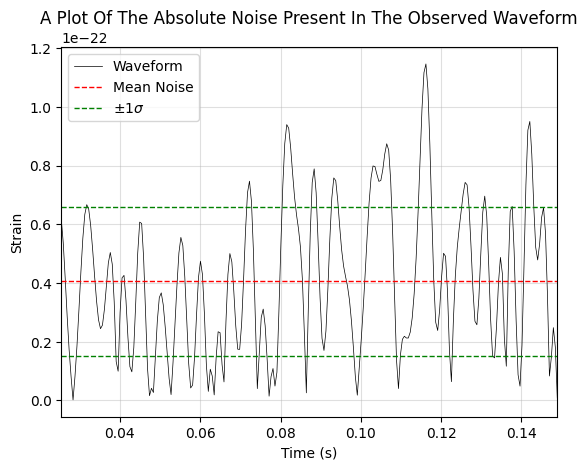

In [16]:
#Taking the absolute values of the noise
abs_obs_noise_strain = abs(obs_noise_strain)

#Finding the mean and standard deviation
average_absolute_noise = np.mean(abs_obs_noise_strain)
std_absolute_noise = np.std(abs_obs_noise_strain)

#Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, abs_obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_absolute_noise, color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axhline(y= average_absolute_noise+std_absolute_noise, color='green', linestyle='--',linewidth=1, label='$\pm1\sigma$')
plt.axhline(y= average_absolute_noise-std_absolute_noise, color='green', linestyle='--',linewidth=1)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Absolute Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(alpha=0.4)
plt.legend()

The average noise value is 4.05e-23 with a standard deviation of 2.53e-23.


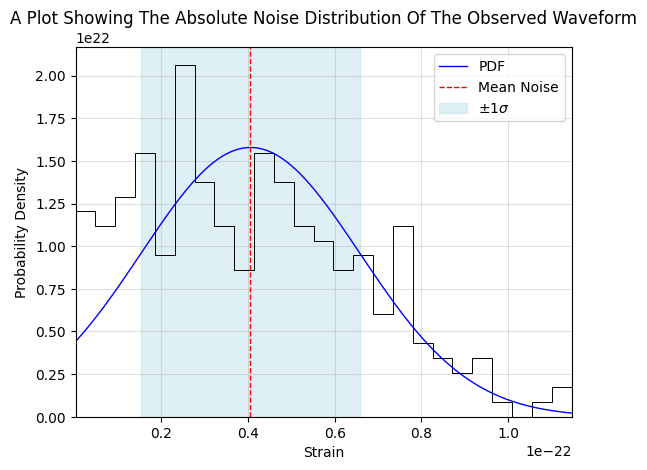

In [17]:
#Creating a normal distribution with mean and std of the noise
dist = stats.norm(average_absolute_noise,std_absolute_noise)
x = np.linspace(min(abs_obs_noise_strain),max(abs_obs_noise_strain),1000)
pdf = dist.pdf(x)

#Plotting a histogram
plt.figure(figsize=(6.4, 4.8))
plt.hist(abs_obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_absolute_noise , color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axvspan(average_absolute_noise - std_absolute_noise, average_absolute_noise + std_absolute_noise, color='lightblue', alpha=0.4, label='$\pm1\sigma$')
plt.xlim(min(abs_obs_noise_strain),max(abs_obs_noise_strain))
plt.title('A Plot Showing The Absolute Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.4)

print(f"The average noise value is {average_absolute_noise:.2e} with a standard deviation of {std_absolute_noise:.2e}.")

Using the absolute values of noise we have calculated the mean to be $4.05\times10^{-23}$, with a standard deviation of $2.53\times10^{-23}$. Once again we can see that the normal distribution fits the noise data relatively well particularly towards the higher values of strain.

The Kolmogorov-Smirnov (KS) test compares the distribution of a dataset with a reference distribution or another dataset. We can use the KS test to evaluate the properties of **`obs_noise_strain`** and **`abs_obs_noise_strain`** by comparing them to a reference distribution, in this case a standard normal distribution.

The null hypothesis, $H_0$, for the KS test is that the two strains are drawn from the same underlying distribution.

The alternative hypothesis, $H_1$, is that the two strains are significantly different from each other and are drawn from different underlying distributions.

Using the built-in function `stats.kstest` we can perform the KS test against a normal distribution to test our hypothesis. We can then generate a theoretical normal CDF and an empiral CDF and plot them to see how visually analyse how well they match. We can also determine the specific values of the KS statistic and p value to decide whether the results are statistically significant.



The KS Test for obs_noise_strain gives a KS statistic of 0.052 and a p value of 4.821e-01
The KS Test for abs_obs_noise_strain gives a KS statistic of 0.081 and a p value of 6.711e-02


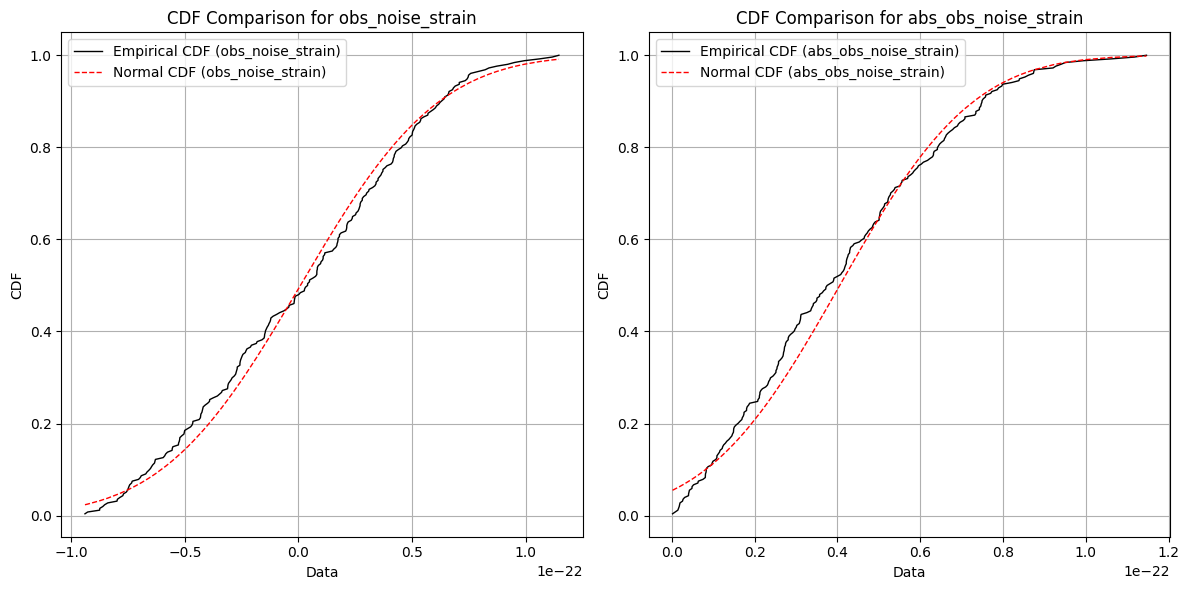

In [18]:
def check_normality_and_plot(data, label):
    # Perform KS test against normal distribution
    mean, std = np.mean(data), np.std(data)
    ks_stat, p_value = stats.kstest(data, 'norm', args=(mean, std))

    print(f"The KS Test for {label} gives a KS statistic of {ks_stat:.3f} and a p value of {p_value:.3e}")

    # Generate theoretical normal CDF
    sorted_data = np.sort(data)
    theoretical_cdf = stats.norm.cdf(sorted_data, loc=mean, scale=std)

    # Empirical CDF
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot
    plt.plot(sorted_data, empirical_cdf, color='black',lw=1, label=f"Empirical CDF ({label})")
    plt.plot(sorted_data, theoretical_cdf, color='red',lw=1, linestyle='--', label=f"Normal CDF ({label})")
    plt.xlabel("Data")
    plt.ylabel("CDF")
    plt.legend()
    plt.title(f"CDF Comparison for {label}")
    plt.grid()

# Check normality for both arrays and plot their CDFs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
check_normality_and_plot(obs_noise_strain, "obs_noise_strain")

plt.subplot(1, 2, 2)
check_normality_and_plot(abs_obs_noise_strain, "abs_obs_noise_strain")

plt.tight_layout()
plt.show()

1. **The left plot shows the KS Test for `obs_noise_strain`**:
- **KS Statistic: 0.0520**:  
  This measures the maximum distance between the empirical cumulative distribution function (ECDF) of `obs_noise_strain` and the reference distribution. A low KS statistic (close to 0) indicates a good match between the two distributions.
- **P-value: 0.48213**:  
  This represents the probability of observing the results if the null hypothesis is true. A p-value of 0.48213 is significantly higher than our chosen significance value p=0.05 which indicates that the observed results are likely to have occured by chance if the null hypothesis is true. Because of this, there is not enough evidence to reject the null hypothesis.  

The empirical CDF does not deviate significantly from the normal CDF and hence we can confirm that the distribution of `obs_noise_strain` is consistent with the normal reference distribution.

2. **The right plots shows the KS Test for `abs_obs_noise_strain`**:
- **KS Statistic: 0.0811**:  
  This indicates a slightly larger maximum difference between the ECDF of `abs_obs_noise_strain` and the reference distribution compared to `obs_noise_strain`. While this value is still relatively small, it suggests these distributions for the absolute noise strain do not match as well as for the observed noise strain.
- **P-value: 0.06711**:  
  This is smaller than the p-value for `obs_noise_strain` but still above our chosen significance value of 0.05. So although there is some deviation from the reference distribution, it is still not statistically significant and hence once again we fail to reject the null hypothesis.

The distribution of `abs_obs_noise_strain` is less consistent with the reference distribution but does not show evidence that it deviates strongly enough to reject the null hypothesis at a 5% significance level.

### Summary:
1. The KS test results suggest that **`obs_noise_strain`** aligns well with the reference distribution, as shown by the low KS statistic and high p-value.
2. For **`abs_obs_noise_strain`**, there is a slight deviation from the reference distribution, but it is not statistically significant at the 5% significance level.
3. These results could indicate that the noise properties of the original data (`obs_noise_strain`) are well-matched to the reference distribution, while taking the absolute value (`abs_obs_noise_strain`) introduces some subtle differences in the distribution.


***

## **Part C - Interpolate reference model to match the observed data time sampling** - [15 marks]

In this part of the question we will learn to match the time samples between our reference waveform
and a mock data waveform with the same mass and distance, so they can be directly compared.
We need to do this so that in Part D onwards we can compare our observations of a gravitational
wave signal (`Observedwaveform.csv`) to a waveform with different values of $M$ and $D$.

The waveform we will use as a reference throughout this CA has known mass and distance $M =
40M_{sun}$, $D = 1Mpc$ and $q = M_2/M_1 = 1$ and is named `reference_waveform_40Msun_1Mpc.csv`.

You will also find some “mock data” for the same mass and distance in the file `mockdata_waveform_40Msun_1Mpc.csv` (which has $t = 0$ at the merger, just like the reference
waveform). Because the mock data file has the same mass and distance as our reference file, we do
not need to worry about the waveform scaling but there is something we need to fix first.

Currently the data waveforms and our reference waveforms have different sampling on the $x$ axis -
ie they have different values of $x$ (time). The reference waveforms have approx 20,000+ time steps,
yet our data has less than hundreds of data points in the same time range! We need to try and
match the $x$ times up so that for each value of 𝑥 we can compare the $y$ values from our observations
(the observed strain) with the $y$ values from the reference waveform.

We need to only consider the times when we have observed data, so we will trim our other datasets.

***

####  Open the mock data file using the `pandas` package. Our data waveform starts at some time $t_{min}$. Find out what this is. Next, take your observed data waveform and output data for $t > t_{min}$ and $t < 0$ (ie only keep information for times $≤ 0$ (before the merger), or for times where there is data). Verify, by plotting, that your new observed waveform only has data in this restricted time range.

**[5 marks]**


In this stage of the analysis, we need to match the time samples between our reference waveform and a mock data waveform with the same mass and distance, so they can be directly compared more easily. This is important as the data waveforms and the reference waveforms are sampled at different time points, meaning the x-values (time) do not align perfectly with one another.

For accurate comparison of the observed waveform (mock data) with the reference waveform, we need to ensure that both datasets are sampled at the same times. Without matching time samples, the y-values (strain) from the reference waveform cannot be directly compared to the corresponding y-values from the observed waveform. Additionally, we want to focus on the time period just before the merger event ($t=0$). Since the mock data file and the reference file both have $t=0$ as the point the objects merge, it is essential to consider only the portion of the data that lies within this time window.

We'll first start by loading the mock data waveform using the `pandas` package. We will then identify the times $t_{min}$ and $t_{max}$ at which the mock data begins and ends. Once we have done this, we will then crop our observed waveform data to these specific times, which ensures that our waveform will align with that of the mock waveform, which is fundamental in order to compare the two.

After cropping the data we will then verify our result by plotting the cropped waveform. This plot should show only data points in the time range between $t_{min}$ and $t_{max}$, which will prove that we have correctly matched the time samples.

In the context of the analysis as a whole, matching the time samples is fundamental in being able to compare our observed waveform against models, which would have otherwise been misaligned with our own data.

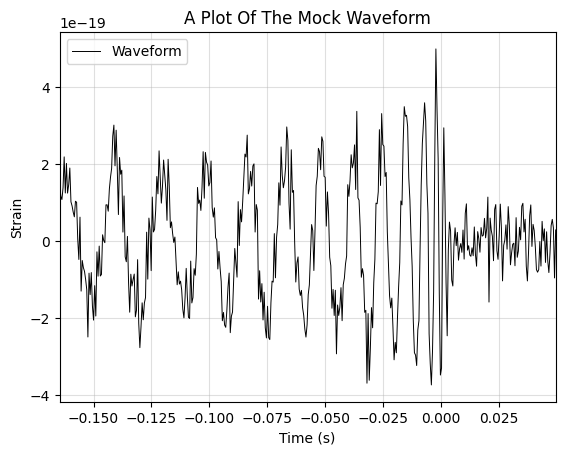

The mock data is inbetween the times: -0.16s and 0.05s.
The observed data is now inbetween the times: -0.16s and 0.05s.


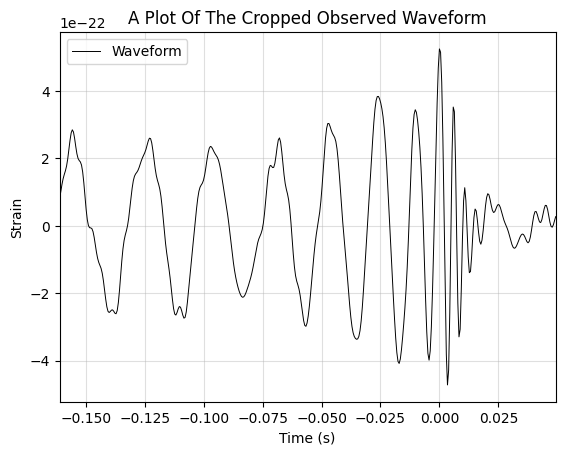

In [26]:
# Using pandas to read in the file and defining the time and strain
mock_data = pd.read_csv('mockdata_waveform_40Msun_1Mpc.csv')
mock_time = mock_data['time (s)']
mock_strain = mock_data['strain']

# Plotting the mock waveform as a reference
plt.plot(mock_time,mock_strain,color='black',linewidth=0.7, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(mock_time),max(mock_time))
plt.title('A Plot Of The Mock Waveform')
plt.grid(alpha=0.4)
plt.show()

# Finding the minimum and maximum times in the mock_time array
t_min = min(mock_time)
t_max = max(mock_time)

# Cropping the observed waveform to only get data points between tmin and tmax of the mock time
ts_obs_time_two = ts_obs_time[(t_min < ts_obs_time) & (ts_obs_time < t_max)]
obs_strain_two = obs_strain[(t_min < ts_obs_time) & (ts_obs_time < t_max)]

# PLotting the cropped waveform
plt.plot(ts_obs_time_two,obs_strain_two,color='black',linewidth=0.7, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.grid(alpha=0.4)
plt.title('A Plot Of The Cropped Observed Waveform')

print(f"The mock data is inbetween the times: {min(mock_time):.2f}s and {max(mock_time):.2f}s.")
print(f"The observed data is now inbetween the times: {min(ts_obs_time_two):.2f}s and {max(ts_obs_time_two):.2f}s.")

As shown in the plots above, as well as the printed time limits, both the mock data and the observed data are now confined to the time range between -0.16s and 0.05s, respectively. By cropping both arrays of data to the same time-frame, this allows us to perform further analysis on the signals more easily. The time limits shown in the plot confirm that both datasets now align within the specified time frame.

---

#### Open the reference file using the `pandas` package. We want to convert our reference waveform to have the same time sampling, ie the same number of $x$ data points as our data (in this question, our mock data). We need to interpolate the reference waveform to match the time samples of the data. To do this use the following code: assuming `ref_x[index]` and `ref_y[index]` are the reference data (time and strain respectively) and `data_x` is the observed data you wish to match the $x$ axis for (this would be `mock_x` for this question):

`from scipy.interpolate import interp1d`

`# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).`

`interp_fn = interp1d(ref_x[index],ref_y[index],bounds_error=False)`

`# now interpolate the data waveform`

`interp_strain = interp_fn(data_x)`

`# plot`

`plt.plot(data_x,interp_strain)`

#### Briefly verify that this works.

####Hints:
- #### One can use the following code example to pull out bits of data `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (index) where the conditions in the bracket have been met. `data[index]` pulls out `data` that satisfy the conditions in the brackets above.

**[10 marks]**


Now that we have cropped our observed data to match the time frame of the mock data, we now need to match the time sampling of a reference waveform of mass $M=40M_\odot$ and distance $D=1 Mpc$ to that of the mock data with identical parameters. This is necessary for direct comparison of the strain values at identical time points across both waveforms. Since the reference waveform has an incredibly high time resolution (more time data points) than the mock data, we need to use interpolation to estimate the reference strain at the exact time points of the mock data.  This process involves first opening the reference waveform using `pandas` which contains thousands of data points of the strain and time data for a gravitational waveform from a system of mass $M=40M_\odot$ and distance $D=1 Mpc$.

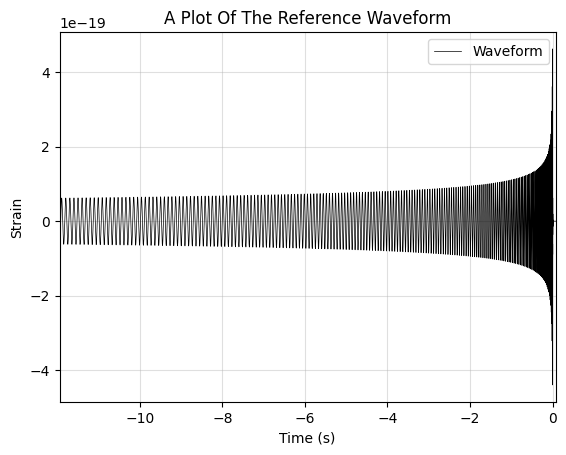

In [20]:
#Reading in the reference file using pandas
reference = pd.read_csv('reference_waveform_40Msun_1Mpc.csv')

#Defining the strain and time
ref_time = reference['time (s)']
ref_strain = reference['strain']

#Plotting the reference waveform
plt.plot(ref_time,ref_strain,color='black',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ref_time),max(ref_time))
plt.title('A Plot Of The Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

We can then use the `interp1d` function from the `scipy.interpolate` module to create an interpolation object `interp_fn`, which takes the reference data ($ref_{time}$ and $ref_{strain}$) and evaluates the strain values at any time point within the time range of the data. We also set the `bounds_error` argument to `False`, so any point outside the bounds of the time rage returns `NaN` instead of an error.

We then use the interolation object `interp_fn`, to calculate the strain values of the reference waveform for the exact time points in the time array of the mock data. The result is a new strain array `interp_strain` that matches the time sampling of the mock data. We can then plot the interpolated strain values, against the mock data time points to confirm that the interpolation aligns with the reference waveform. If everything works, we would expect the interpolated reference waveform to align perfectly with the mock waveform.

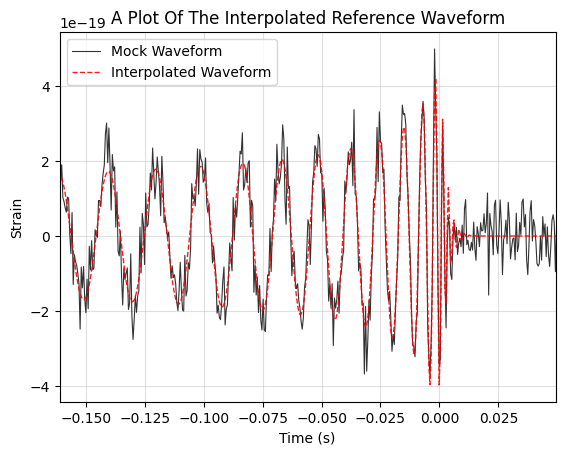

The length of the mock strain array is 440
The length of the interpolated strain array is 440


In [24]:
#Creating an interpolation object of the ref_time and ref_strain
interp_fn = interp1d(ref_time[:],ref_strain[:],bounds_error=False)

#Interpolating the ref_strain to fit the mock_time sampling
new_strain = interp_fn(mock_time)

#Plotting the interpolated strain against the mock time
plt.plot(mock_time, mock_strain,color='black',linewidth=0.8, label='Mock Waveform', alpha=0.8)
plt.plot(mock_time, new_strain,'r--',linewidth=1, label='Interpolated Waveform', alpha=0.9)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Interpolated Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

# Verifying the length of the two strain arrays are the same
print(f"The length of the mock strain array is {len(mock_strain)}")
print(f"The length of the interpolated strain array is {len(new_strain)}")

As shown in the plots above, the general shape of the interpolated waveform closely matches the mock waveform as expected. The only notable deviations appear to be due to noise present within the mock data, however despite this, we can conclude that the interpolation object works correctly. To further verify this, the print statement confirms that both the mock strain array and the interpolated strain array have lengths of 440, indicating that the interpolation has again worked correctly.

---

## **Part D - Using model waveforms to estimate the total mass and distance to the system ("a by-eye estimate")** - [24 marks]

#### In this part of the question we will attempt to produce a waveform for any mass and distance values using our reference waveform with $M = 40M_\odot$, $D = 1Mpc$ and $q = M_2/M_1 = 1$ and scaling it by any new mass and distance. The reference waveform/template we will use is the same as before: `reference_waveform_40Msun_1Mpc.csv`.

#### You will need to follow the steps below when answering this question:
1. #### Write a function in python to produce the time $t$ and strain $h$  of a general waveform with $q = 1$, total mass $M$ and distance $D$ from the interpolation object you created above, using the equations for how the waveform strain and time depends on mass and distance from the Chapter 8 Jupyter Notebook.

**[10 marks]**

Now that we are able to successfuly interpolate a reference waveform of a known $M$ and $D$ to any time frame, we will now focus on being able to use this interpolation to scale the reference waveform to produce a waveform for any given value of mass or distance. When compleetd, this will allow us to to generate the gravitational waveform of any mass binary object at any distance.

This scaling can be done through two equations:

**Time Scaling**

$$t_{ref} = \frac{M_{ref}}{M}t$$

This equation scales the time array of the waveform based on the ratio of the reference mass, $M_{ref}=40M\odot$, and the mass, $M$, of the waveform we want to produce. This equation comes about as the timescales of gravitational wave signals depend on the total mass of the system. Larger mass systems result in a faster evolution of the waveform whereas the waveform evolves slower for smaller masses.
If the mass $M$ is greater than the reference mass $M_{ref}$, the waveform will evolve at a slower rate, stretching the time axis. The factor $\frac{M_{ref}}{M}$ compresses or expands the reference time array accordingly.


* If $M > M_{ref}$, the waveform will evolve at a slower rate than the reference waveform as the scaling factor will be less than 1 hence compressing the time axis.

* If $M < M_{ref}$, the waveform will evolve more rapidly than the reference waveform. The scaling factor will be greater than 1, expanding the time axis.

**Strain Scaling**

$$h(t,M,D) = \frac{M}{M_{ref}}\frac{D_{ref}}{D}h(t_{ref})$$

The strain scaling equation, scales the strain based on the mass $M$ and distance $D$. This equation scales the strain $h$ of the waveform based on the total mass $M$ and distance $D$. From the equation we can see that the strain of a gravitational wave increases with the mass of the system, which is what we expect as more energy will be released in the form of gravitational waves. We can also see that the strain decreases with distance as expected, because as gravitational waves propagate they lose energy, hence decreasing the strain.

By using these equations, we can adjust the reference waveform to match any given mass and distance, which is crucial for comparing gravitational wave signals from different sources.



In the next cell ,we will create a function called `ModelFunction` which takes the values for $M$ and $D$ and returns the following information:

1. **Scaling The Time:**

  `t_scaled = (40 / M) * ts_obs_time_two`
  
  The reference time array `ts_obs_time_two` is scaled by the factor $M_{ref}/M$ to account for the new mass $M$. This scaling adjusts the time points to reflect the slower or faster evolution of the waveform based on the mass. WE use `ts_obs_time_two` as the reference time array because the analysis is centered around the observed data.

2. **Interpolating The Reference Strain:**

  `h_ref_scaled = interp_fn(t_scaled)`
  
  The scaled time array is passed into the interpolation object (`interp_fn`) created previously, which evaluates the strain of the reference waveform at these new time data points.

3. **Scaling The Strain:**
  
  `h_scaled = (M / 40) * (1 / D) * h_ref_scaled`
  
  The strain is scaled by the factor $\frac{M}{M_{ref}}$ to account for the mass and by the factor $\frac{D_{ref}}{D}$ to account for the distance. The combination of these two terms creates an array of the strain of a waveform with mass $M$ and distance $D$.

4. **Returning The New Strain:**

 `return h_scaled`

  Finally, the function returns an array of the strain of a gravitational waveform with paramaters $M$ and $D$.

To verify that this function works correctly, we can plot the mock data (with known parameters $M=40M\odot$ and $D=1Mpc$) along with the output of `ModelFunction(40,1)`. If the function is has worked correctly, we expect the waveforms to be almost perfectly aligned.

Text(0, 0.5, 'Strain')

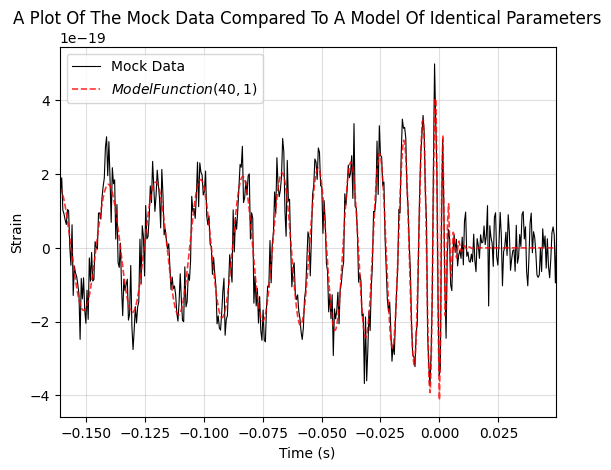

In [31]:
#Creating our function
def ModelFunction(M, D):
    t_scaled = (40 / M) * ts_obs_time_two # Scaling the time
    h_ref_scaled = interp_fn(t_scaled) # Interpolating the reference strain at the scaled time using the interpolation object defined previously
    h_scaled = (M / 40) * (1 / D) * h_ref_scaled # Scaling the strain
    return h_scaled    # Scaling the strain

# Verifying that the function works correctly
plt.plot(mock_time, mock_strain,lw=0.8, color = 'black', label='Mock Data')
plt.plot(ts_obs_time_two, ModelFunction(40,1), 'r--',lw=1.2, label='$ModelFunction(40,1)$',alpha = 0.8)
plt.legend()
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Data Compared To A Model Of Identical Parameters')
plt.grid(alpha=0.4)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

As shown in the plot above, the waveform generated by our function aligns perfectly with the mock data, confirming that the function is working as we intend.

---

#### Test your function works by substituting in values of $M = 70M_\odot$ and $D = 5Mpc$, and compare the output waveform with the mock data in `mockdata_waveform_70Msun_5Mpc.csv`. Comment on your result.

**[6 marks]**

In this question we will again test the validity of the function created in the previous step by substituting values $M=70M\odot$ and $D=5 Mpc$ and comparing the output waveform with the mock data from the file mockdata_waveform_70Msun_5Mpc.csv, which is a waveform with these exact parameters. This test ensures that the scaling of the waveform works correctly for different mass and distance parameters.

Testing the function with known values of mass and distance, and comparing the resulting waveform to the corresponding mock data, serves as a validation step. By using mock data that corresponds to these specific parameters, we can directly check whether the waveform produced by our function accurately matches the expected result. This comparison allows us to identify any discrepancies between the model and the observed data, and verify that the scaling of both time and strain is functioning as expected.

To do this, we will subsitute values of $M=70M\odot$ and $D=5 Mpc$
into the function we wrote previously. This will scale the reference waveform to match the new mass and distance. We will then load the mock data from mockdata_waveform_70Msun_5Mpc.csv using pandas to obtain the expected gravitational waveform for this mass and distance.
We will then compare the output of our function with the mock data by plotting both the scaled waveform and the mock data on the same graph so we can see how close they align.

By doing this test, we make sure that the function we created can accurately scale the reference waveform for different values of mass and distance. This is a crucial step in the overall analysis, as it verifies that the theoretical waveforms generated by our model are accurate and reliable before comparing with real observed data. If the function works correctly, it will allow us to generate accurate waveforms for any given set of mass and distance values, which is fundamental for this analsysis.

So plotting the mock and model waveform:

Text(0, 0.5, 'Strain')

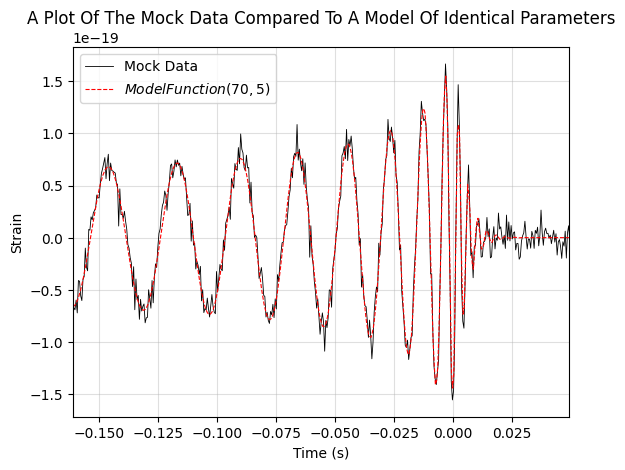

In [33]:
# Reading in the mock data
mock70 = pd.read_csv('mockdata_waveform_70Msun_5Mpc.csv')
mock70_time = mock70['time (s)']
mock70_strain = mock70['strain']

# Using the function to create a model waveform with M = 70 and D = 5
model_strain = ModelFunction(70,5)

# Plotting the mock data against the model
plt.plot(mock70_time, mock70_strain,lw=0.6, color = 'black', label='Mock Data')
plt.plot(ts_obs_time_two, model_strain, 'r--',lw=0.8, label='$ModelFunction(70,5)$',alpha = 1)
plt.legend()
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Data Compared To A Model Of Identical Parameters')
plt.grid(alpha=0.4)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

Looking at the plots, the two waveforms align closely in both shape and scale, with some minor deviations caused by noise within the mock data. Therefore we can conclude that the function works correctly, and the scaling method is valid for this set of parameters. Therefore we can start using this function to look at our observed data.

---

#### Use your function to scale the reference waveform ($M = 40M_\odot$, $D = 1Mpc$) to make an initial rough estimate “by eye” of the total mass and distance that “best” fits your data (e.g. to within $+/- 5M_\odot$, $+/- 100Mpc$).

**[8 marks]**

To obtain an initial rough estimate of the total mass $M$ and distance $D$ that best fits the observed waveform signal, we can use our scaling function to compare waveforms of different parameters to the observed data to get a rough idea. This process involves varying $M$ and $D$ and visually examining how well the resulting waveform aligns with the observed data.

To do this we first decided to vary the mass while keeping the distance fixed at a placeholder value of $D=1500 Mpc$ as this value meant that the strain of the waveforms were on the same scale as the observed waveform. This was done because the mass affects the frequency and amplitude of the wave whilst distance only affects the amplitude, so by first varying mass we can then find a value for the distance. We then plotted the ModelFunction with $D=1500 Mpc$ and $M = (30, 50, 70, 90 ,110)M\odot$ resepectively. We then plotted the resulting waveforms and compared them visually to the observed data.

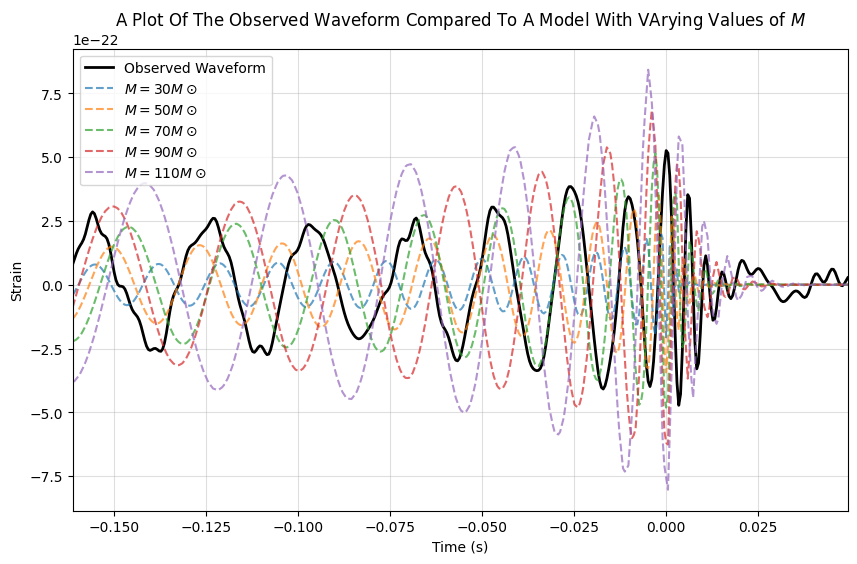

In [34]:
# Define the range of M values
M_values = [30, 50, 70, 90, 110]

# Plotting the observed waveform for reference
plt.figure(figsize=(10, 6))
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform')

# Looping through the different values of M and plottin ModelFunction(M, 1500)
for M in M_values:
  model_strain = ModelFunction(M, 1500)
  plt.plot(ts_obs_time_two, model_strain,'--', label=f'$M = {M}M\odot$ ', alpha = 0.7)

# Formatting the plotting
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With VArying Values of $M$')
plt.grid(alpha=0.4)
plt.legend()

From the plot above, we found that a value of $M=70M\odot$ provided the closest match to the observed waveform in terms of shape and frequency. The results aren't perfect, however for a ""rough-eye" estimate, it's a good approximation.

Now we have an approximate value for $M$, we can then vary the distance over a smaller range as $D=1500 Mpc$ already provides quite a good fit. So we write a for loop that loops through $D=(1200, 1300, 1400, 1500, 1600) Mpc$ and plot ModelFunction(70,D) against the obsereved waveform to find a good match.

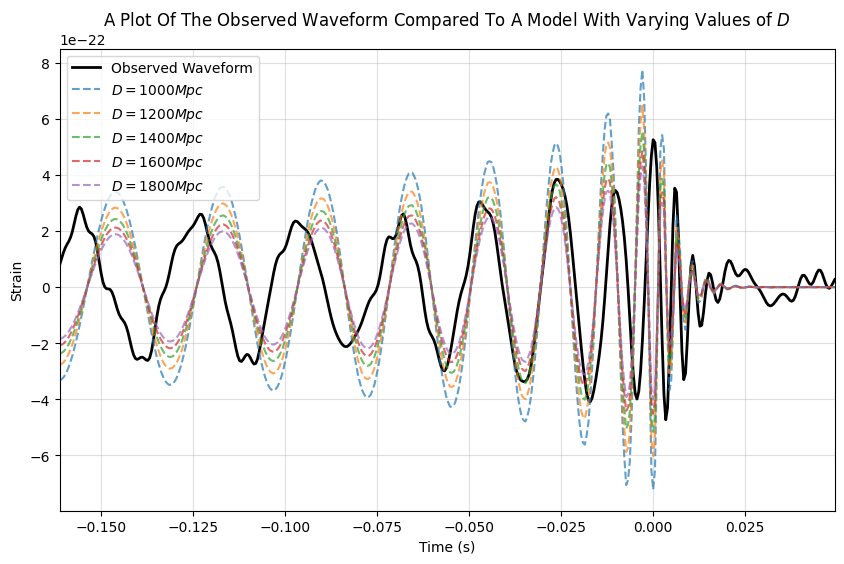

In [35]:
# Define the range of D values
D_values = [1000,1200,1400,1600, 1800]

# Plotting the observed waveform for reference
plt.figure(figsize=(10, 6))
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform')

# Looping through the different values of D and plottin ModelFunction(70, D)
for D in D_values:
  model_strain = ModelFunction(70, D)
  plt.plot(ts_obs_time_two, model_strain,'--', label=f'$D = {D} Mpc$ ', alpha = 0.7)

# Formatting the plotting
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With Varying Values of $D$')
plt.grid(alpha=0.4)
plt.legend()

From the plot above, the value of $D$ that seems to produce the waveform with the closest match to the observed waveform is $D=1400 Mpc$.

Now that we have initial guesses for $M$ and $D$, we can refine our estimates further by testing more precise values through trial and error. After doing this, we found that values of $M=73M\pm5\odot$ and $D=1450\pm100 Mpc$ produce a waveform that best fits the observed data (as shown below).

While the waveforms do not match perfectly, these estimates provide a reasonably close approximation, particularly for a rough "by eye" approach. Furthermore these values not only provide a good starting point for a more precise parameter estimation process using techniques such as Monte Carlo Markov Chains, but also act as a reference to test the validity of our final results.


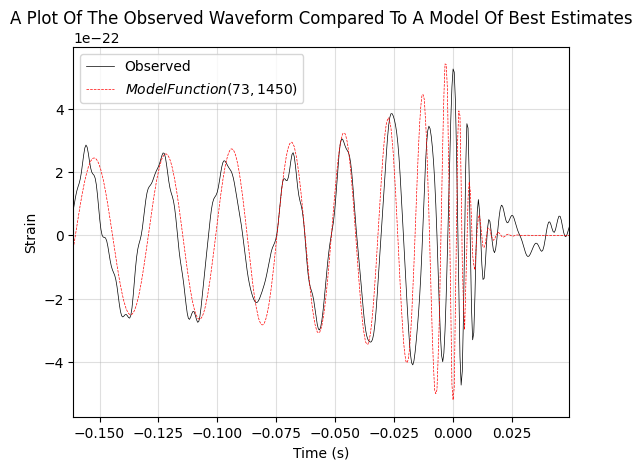

In [36]:
# Plotting the observed waveform with our model of parameters M = 73 and D = 1450
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=0.5, label='Observed')
plt.plot(ts_obs_time_two, ModelFunction(73,1450),'r--',linewidth=0.5, label = '$ModelFunction(73,1450)$')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model Of Best Estimates')
plt.grid(alpha=0.4)
plt.legend()


---

## **Part E - Estimating the total mass using MCMC** - [75 marks]

## **Part F - Putting it all together** - [36 marks]